In [1]:
import numpy as np
import pandas as pd

In [2]:
dataframe = pd.read_csv("C:/Users/oekpom/Desktop/Datasets/Machine Learning/Lesson 9/car_evaluation.csv")

In [3]:
dataframe.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
dataframe.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
dataframe["target"] = dataframe["class"]
dataframe = dataframe.drop("class", axis=1)

In [6]:
dataframe.target.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [7]:
dataframe["target"] = dataframe["target"].replace("vgood", 3)
dataframe["target"] = dataframe["target"].replace("good", 2)
dataframe["target"] = dataframe["target"].replace("acc", 1)
dataframe["target"] = dataframe["target"].replace("unacc", 0)

In [8]:
dataframe.target.unique()

array([0, 1, 3, 2], dtype=int64)

In [9]:
dataframe["buying"]=pd.get_dummies(dataframe["buying"])
dataframe["maint"]=pd.get_dummies(dataframe["maint"])
dataframe["lug_boot"]=pd.get_dummies(dataframe["lug_boot"])
dataframe["safety"]=pd.get_dummies(dataframe["safety"])
dataframe["doors"]=pd.get_dummies(dataframe["doors"])
dataframe["persons"]=pd.get_dummies(dataframe["persons"])

In [10]:
dataframe.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,0,0,1,1,0,0,0
1,0,0,1,1,0,0,0
2,0,0,1,1,0,1,0
3,0,0,1,1,0,0,0
4,0,0,1,1,0,0,0


In [11]:
x = dataframe.drop('target', axis=1)
y = dataframe.target

In [12]:
x.shape, y.shape

((1728, 6), (1728,))

In [13]:
from sklearn.decomposition import PCA

In [14]:
sklearn_pca = PCA()

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null uint8
maint       1728 non-null uint8
doors       1728 non-null uint8
persons     1728 non-null uint8
lug_boot    1728 non-null uint8
safety      1728 non-null uint8
target      1728 non-null int64
dtypes: int64(1), uint8(6)
memory usage: 23.7 KB


In [16]:
sklearn_pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
principalComponents = sklearn_pca.transform(x)

In [18]:
print('Explained variation per principal component: {}'.format(sklearn_pca.explained_variance_ratio_))

Explained variation per principal component: [0.18079096 0.18079096 0.18079096 0.15254237 0.15254237 0.15254237]


In [19]:
sklearn_pca = PCA(n_components=5)
sklearn_pca.fit(x)
principalComponents = sklearn_pca.transform(x)
print('Explained variation per principal component: {}'.format(sklearn_pca.explained_variance_ratio_))

Explained variation per principal component: [0.18079096 0.18079096 0.18079096 0.15254237 0.15254237]


In [20]:
PCs = pd.DataFrame(data = principalComponents, columns = ["pc1", "pc2","pc3","pc4","pc5"])

In [21]:
PCs.tail()

,pc1,pc2,pc3,pc4,pc5
1723,-0.333333,-0.433743,-0.184634,-0.342694,-0.086952
1724,-0.333333,-0.060079,0.742931,-0.342694,-0.086952
1725,-0.333333,0.493822,-0.558297,-0.342694,-0.086952
1726,-0.333333,0.493822,-0.558297,-0.342694,-0.086952
1727,-0.333333,0.867485,0.369267,-0.342694,-0.086952


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

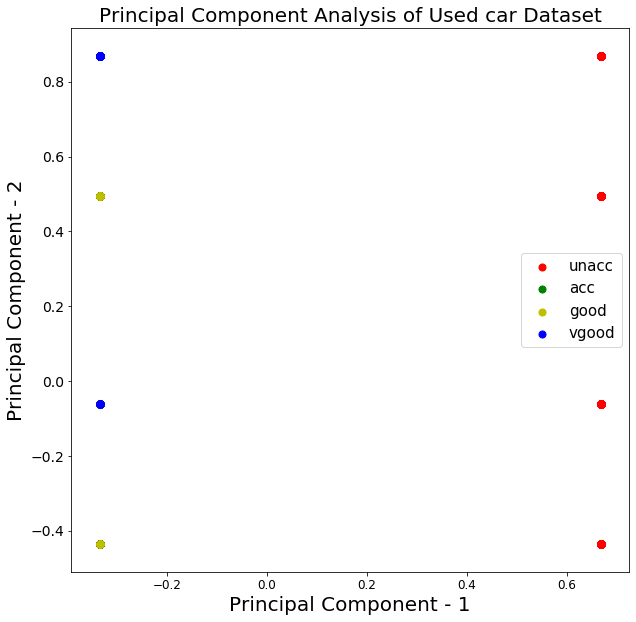

In [23]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Used car Dataset",fontsize=20)
targets = [0, 1, 2, 3]
Legend = ['unacc', 'acc', 'good', 'vgood']
colors = ['r', 'g', 'y', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = dataframe['target'] == target
    plt.scatter(PCs.loc[indicesToKeep, 'pc1'], PCs.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(Legend,prop={'size': 15})

In [24]:
x = PCs
y = dataframe.target

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

In [27]:
LogReg.fit(x_train, y_train)

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = LogReg.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy with Logistic Regression model is: {}'.format(accuracy))

The accuracy with Logistic Regression model is: 0.7726396917148363


In [30]:
from sklearn.svm import SVC

In [31]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
y_predict = svc_model.predict(x_test)

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy with SVM model is: {}'.format(accuracy))

The accuracy with SVM model is: 0.7726396917148363


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [35]:
accuracy = accuracy_score(y_test,y_pred)
print('The accuracy with DecisionTree model is: {}'.format(accuracy))

The accuracy with DecisionTree model is: 0.7630057803468208


In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [37]:
seed = 7
n_trees = 30

k_fold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=n_trees, random_state=seed)
results = cross_val_score(model,x,y,cv=k_fold)
print(results.mean())

0.7151633284043555


In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()

seed = 7
n_trees = 30

k_fold = KFold(n_splits=10, random_state=seed)
model = XGBClassifier(n_estimators=n_trees, random_state=seed)
results = cross_val_score(model,x,y,cv=k_fold)
print(results.mean())